In [2]:
import itertools

subset_list = [0, 2, 3]
combi =  itertools.chain(*map(lambda x: itertools.combinations(subset_list, x), range(2, len(subset_list)+1)))

for subset in combi:
    print (subset)

(0, 2)
(0, 3)
(2, 3)
(0, 2, 3)


### np.polyfit으로 polynomial fitting (y = ax + b)하기

[ 0.19904459 -0.32961783]


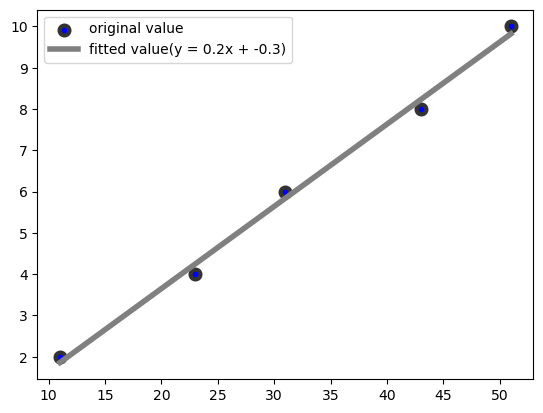

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([11, 23, 31, 43, 51])
y_data = np.array([2, 4, 6, 8, 10])    
 
#plt.plot (x_data, y_data, color = "blue", label = "original value")
plt.scatter (x_data, y_data, s = 50, edgecolor = "#333333", linewidth = 3 ,color = "blue", label = "original value")

# 1차원 다항식으로 fitting
curve = np.polyfit(x_data, y_data, 1)     # y = curve[0] (log_x_data) + curve[1]
y_fit = curve[0] * x_data + curve[1]
plt.plot (x_data, y_fit, color = "gray", linewidth = 4, label = "fitted value(y = {}x + {})".format(round(curve[0],1), round(curve[1], 1) ))
print(curve)

plt.legend()
plt.show()

### 일단 df로 input받기

In [2]:
import pandas as pd

df = pd.read_csv("fitting_MRS_FPratio_1.data", header=None,  delim_whitespace=True)

df.columns = ["x", "y"]

# df2 = pd.concat ( [pd.DataFrame ([ {"x":0, "y": 60}, {"x":0, "y": 55}, {"x":0, "y": 50} ] , index = [0, 1, 2]), df] ).reset_index (drop = True)  # 맨 위에 (0,50 하나 끼워넣기)
# df2 = pd.concat ( [pd.DataFrame ([ {"x":0, "y": 60},  {"x":0, "y": 50} ] , index = [0, 1]), df] ).reset_index (drop = True)  # 맨 위에 (0,60 하나 끼워넣기)
df2 = pd.concat ( [pd.DataFrame ([ {"x":0, "y": 50} ] , index = [0]), df] ).reset_index (drop = True)  # 맨 위에 (0,50 하나 끼워넣기)
df2 ["x"] = df2.index
df = df2

### 전통적인 logarithmic function expression

a = 1.4	b= -4.3650708906409115		K=60		K/loga1 = 5.109361921243566


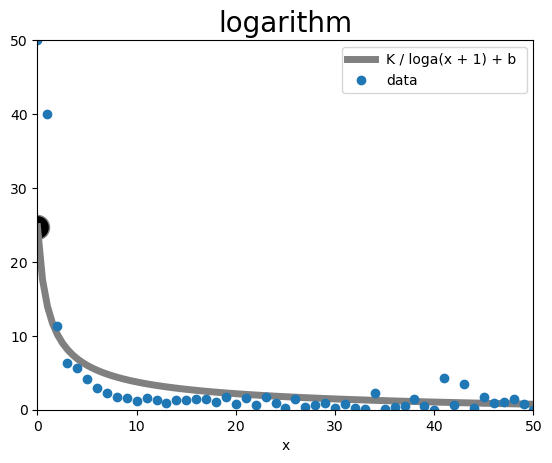

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

a, K = 1.4,  60
b = -K / math.log ( 102, a)

def logarithm(x):
  return ( K /  math.log ( (x + 2) , a) + b)        # 밑 : b

x= np.linspace(0, 50,100)


plt.plot(x, np.vectorize(logarithm)(x), linewidth=5, color = "gray", label = "K / loga(x + 1) + b ")
plt.plot(df2["x"], df2["y"], 'o', label='data')
plt.scatter ( 0, logarithm (0), s = 300, color = "black", marker = "o", edgecolors ="gray")

print ("a = {}\tb= {}\t\tK={}\t\tK/loga1 = {}".format (a, b, K,  K / math.log ( 52, a )))

plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel('x')
plt.title('logarithm', fontsize = 20)
plt.legend()
plt.show()

## Fitting 하기

In [5]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# a, K = 1.4,  40
# b = -K / math.log ( 102, a)

def logarithm(x, a, K):
    #b = -K / math.log ( 102, a)
    b = 30
    #return ( K /  math.log ( a * (x + 2) ) + b)        # 밑 : b
    return -math.log ( (x + 2) , a) + K


#popt, pcov = curve_fit ( logarithm, df["x"], df["y"], method='trf', bounds=([1.3, 10], [2.3, 50]) )          #  ([low_a,low_K],[high_a,high_K])    # b : inflection point 의 x값
#popt, pcov = curve_fit ( logarithm, df["x"], df["y"], method='lm' )          # a, K를 fitting 해서 알려주세요
popt, pcov = curve_fit ( logarithm, df["x"][1:], df["y"][1:] )          # a, K를 fitting 해서 알려주세요

print ("popt = {}\npcov={}".format(popt, pcov))

x = np.linspace(1, 100, 201)
y = logarithm(x, *popt)

plt.plot(df["x"], df["y"], 'o', label='data')
plt.plot(x,y, label="after fitting" )
#plt.ylim(0, 1.3)
plt.legend(loc='best')

TypeError: cannot convert the series to <class 'float'>

### 지수함수로 fitting 하기

/home/goldpm1/miniconda3/envs/cnvpytor/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


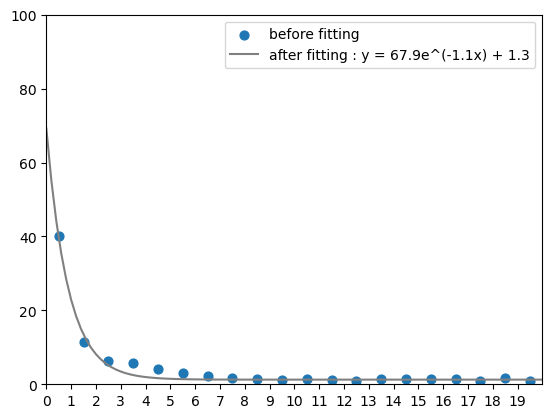

In [9]:
x = np.array ( df["x"][1:] - 0.5, dtype=float ) 
y = np.array ( df["y"][1:], dtype=float )


def func(x, a, b, c):
    return a*np.exp(-b * x) + c

popt, pcov = curve_fit ( func, x, y , method = "lm" )


a, b, c = np.asarray ( popt )

plt.scatter(x, y, s = 40,  label="before fitting" )

x_end = 20
x_fit = np.linspace(0, x_end, 101)
y_fit = func(x_fit, *popt)
plt.xlim(0, x_end)
plt.ylim(0, 100)

plt.plot(x_fit, y_fit, color = "gray",  label="after fitting : y = {}e^({}x) + {}".format( round(a, 1), - round(b, 1), round(c , 1)) )
plt.xticks ( list(range(0, x_end)) )

plt.legend()

## Prior를 이용하지 않고 Binomial 을 이용한 false positive fitting (w = 1)

Text(0, 0.5, 'P (FP)')

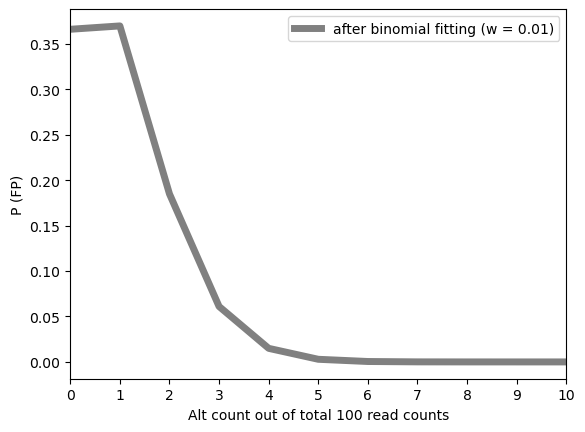

In [1]:
import scipy.stats
from scipy.special import beta, gamma
import math
import matplotlib.pyplot as plt
import numpy as np

bin = 100
w = 1 / bin  #  0.01
p = np.zeros (bin)

for k in range (0, bin):
    p[k] =  scipy.stats.binom.pmf (n = bin,k = k, p = w)            # 


#plt.ylim(0, 100)

plt.plot( list(range(0, bin)) , p, linewidth = 5, color = "gray",  label="after binomial fitting (w = {})".format(w) )
plt.xticks ( list(range(0, bin)) )
plt.legend()
plt.xlim(0, 10)
plt.xlabel("Alt count out of total {} read counts".format(bin))
plt.ylabel("P (FP)")


In [5]:
import scipy
import math

alt_obs, depth_obs, alt_expected, depth_expected = 0, 100, 10, 100

print (  math.log10(scipy.stats.betabinom.pmf(alt_obs, depth_obs, alt_expected+1, depth_expected+1)) )

-3.175739461252674


In [1]:
import numpy as np
import itertools

membership_answer_numerical = np.array ( [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] )
my_membership = np.array (  [0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3] )
ANSWER_NUM_CLONE = 2
max_score = 0
max = []

for tt in list(itertools.permutations( list(range(0, np.max(my_membership) + 1)),  ANSWER_NUM_CLONE + 1 ) ):
    index_dict = {}
    for i in range(0, ANSWER_NUM_CLONE + 1):
        index_dict[i] = tt[i]
    
    print (tt)



(0, 1, 2)
(0, 1, 3)
(0, 2, 1)
(0, 2, 3)
(0, 3, 1)
(0, 3, 2)
(1, 0, 2)
(1, 0, 3)
(1, 2, 0)
(1, 2, 3)
(1, 3, 0)
(1, 3, 2)
(2, 0, 1)
(2, 0, 3)
(2, 1, 0)
(2, 1, 3)
(2, 3, 0)
(2, 3, 1)
(3, 0, 1)
(3, 0, 2)
(3, 1, 0)
(3, 1, 2)
(3, 2, 0)
(3, 2, 1)


In [ ]:
for tt in list(itertools.permutations( list(range(0, ANSWER_NUM_CLONE + 1)),  ANSWER_NUM_CLONE + 1 ) ):
    index_dict = {}
    for i in range(0, ANSWER_NUM_CLONE + 1):
        index_dict[i] = tt[i]
    
    print (index_dict)

    # 정답 membership을 돌려보기
    temp = []
    for i in range(len(membership_answer_numerical)):
        temp.append( index_dict[ membership_answer_numerical [i] ] )
        
    #print ("membership_answer_character : {}\ntt : {}\nindex_dict : {}\ntemp : {}".format ( membership_answer_character [0:10], tt [0:10], index_dict, temp [0:10]  ))
    if FP_MATCH == False:
        for i in range(len(membership_answer_numerical)):
            if membership_answer_character [i] == "FP":
                temp [i] = 99
        #print ("FP_MISMATCH -> temp : {}".format (temp[0:10]))
                        
    # maxmaxmax_membership과의 일치도 확인
    if np.sum(np.equal(temp, my_membership)) > max_score:
        max_score = np.sum(np.equal(temp, my_membership))
        max = temp
        
    #print ("matching score = {}점\n".format ( max_score ))
    
        

sample_dict_rev={}
for i in range(len(max)):
    sample_dict_rev[max[i]] = membership_answer_character[i]    # {3: 'MRC5_het', 4: 'FP', 0: 'V3_het', 1: 'V5_het', 2: 'V1_het'}

print ("모두 다 돌려본 결과 ->  max_score : {},  변환표 = {}".format ( max_score, sample_dict_rev))

In [2]:
import numpy as np
import itertools

list(itertools.permutations( list(range(0, 8)),  5 ) )

[(0, 1, 2, 3, 4),
 (0, 1, 2, 3, 5),
 (0, 1, 2, 3, 6),
 (0, 1, 2, 3, 7),
 (0, 1, 2, 4, 3),
 (0, 1, 2, 4, 5),
 (0, 1, 2, 4, 6),
 (0, 1, 2, 4, 7),
 (0, 1, 2, 5, 3),
 (0, 1, 2, 5, 4),
 (0, 1, 2, 5, 6),
 (0, 1, 2, 5, 7),
 (0, 1, 2, 6, 3),
 (0, 1, 2, 6, 4),
 (0, 1, 2, 6, 5),
 (0, 1, 2, 6, 7),
 (0, 1, 2, 7, 3),
 (0, 1, 2, 7, 4),
 (0, 1, 2, 7, 5),
 (0, 1, 2, 7, 6),
 (0, 1, 3, 2, 4),
 (0, 1, 3, 2, 5),
 (0, 1, 3, 2, 6),
 (0, 1, 3, 2, 7),
 (0, 1, 3, 4, 2),
 (0, 1, 3, 4, 5),
 (0, 1, 3, 4, 6),
 (0, 1, 3, 4, 7),
 (0, 1, 3, 5, 2),
 (0, 1, 3, 5, 4),
 (0, 1, 3, 5, 6),
 (0, 1, 3, 5, 7),
 (0, 1, 3, 6, 2),
 (0, 1, 3, 6, 4),
 (0, 1, 3, 6, 5),
 (0, 1, 3, 6, 7),
 (0, 1, 3, 7, 2),
 (0, 1, 3, 7, 4),
 (0, 1, 3, 7, 5),
 (0, 1, 3, 7, 6),
 (0, 1, 4, 2, 3),
 (0, 1, 4, 2, 5),
 (0, 1, 4, 2, 6),
 (0, 1, 4, 2, 7),
 (0, 1, 4, 3, 2),
 (0, 1, 4, 3, 5),
 (0, 1, 4, 3, 6),
 (0, 1, 4, 3, 7),
 (0, 1, 4, 5, 2),
 (0, 1, 4, 5, 3),
 (0, 1, 4, 5, 6),
 (0, 1, 4, 5, 7),
 (0, 1, 4, 6, 2),
 (0, 1, 4, 6, 3),
 (0, 1, 4, 6, 5),
 (0, 1, 4,